In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Data Set

In [8]:
df = pd.read_csv(r'D:\python\project1\Sales Pridection using python\Advertising1.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Data PreProcessiong

In [9]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [41]:
# Summary Of Data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


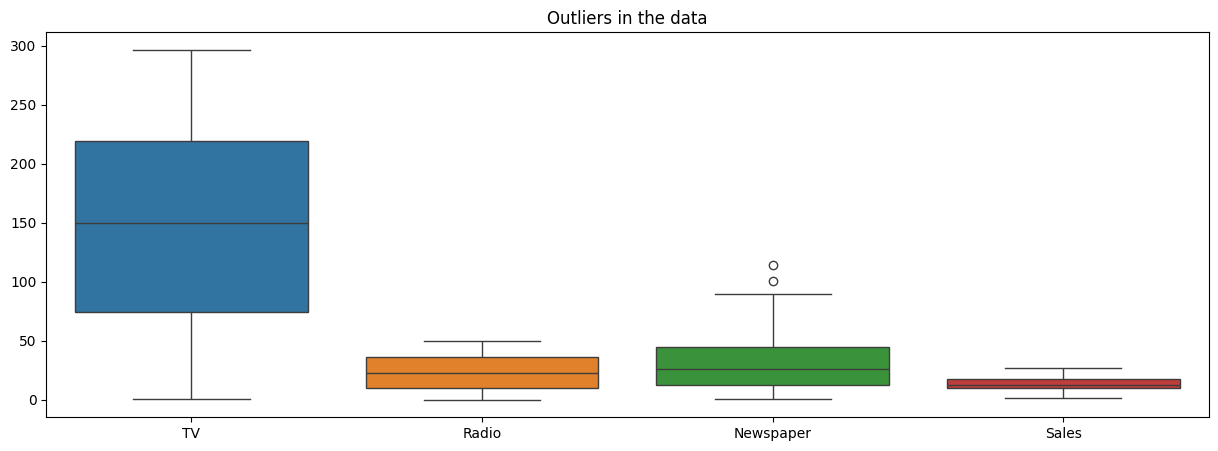

In [21]:
#check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

<Figure size 300x300 with 0 Axes>

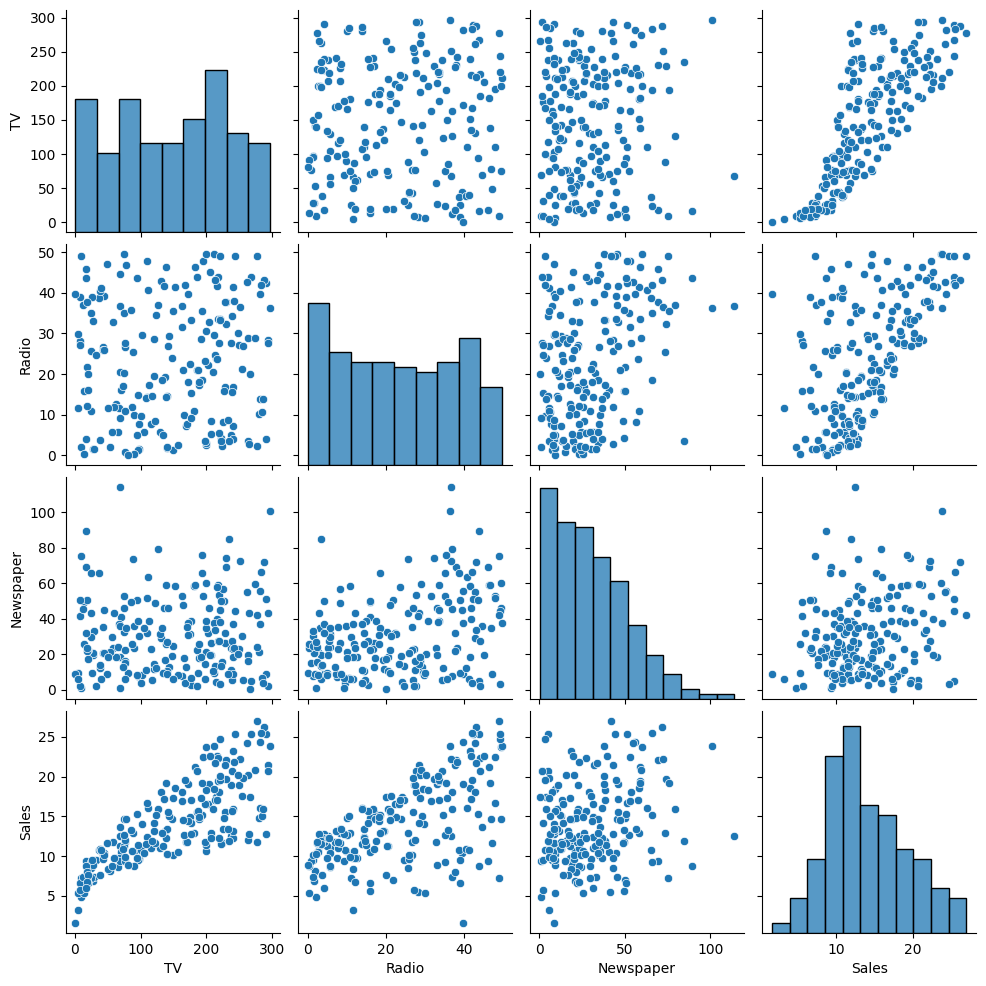

In [43]:
# Pairplot For checking behavior of data
plt.figure(figsize=(3,3))
sns.pairplot(df)
plt.show()

# Visualization

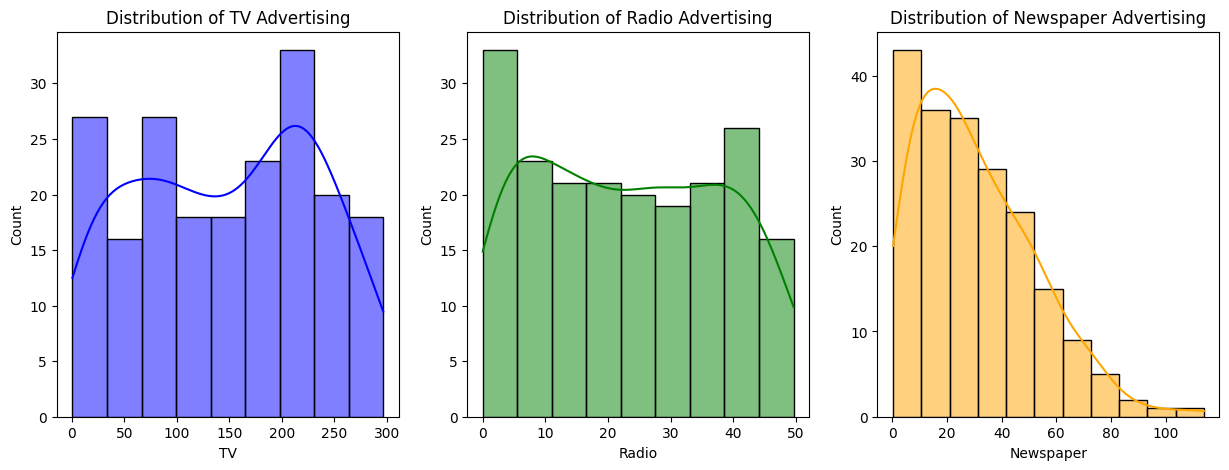

In [ ]:
# Plot histograms for independent variables
plt.figure(figsize=(15, 5))

##For TV Advertising
plt.subplot(1, 3, 1)
sns.histplot(data['TV'], kde=True, color='blue')
plt.title('Distribution of TV Advertising')

####For Radio Advertising
plt.subplot(1, 3, 2)
sns.histplot(data['Radio'], kde=True, color='green')
plt.title('Distribution of Radio Advertising')

####For Newspaper Advertising
plt.subplot(1, 3, 3)
sns.histplot(data['Newspaper'], kde=True, color='orange')
plt.title('Distribution of Newspaper Advertising')

plt.show()

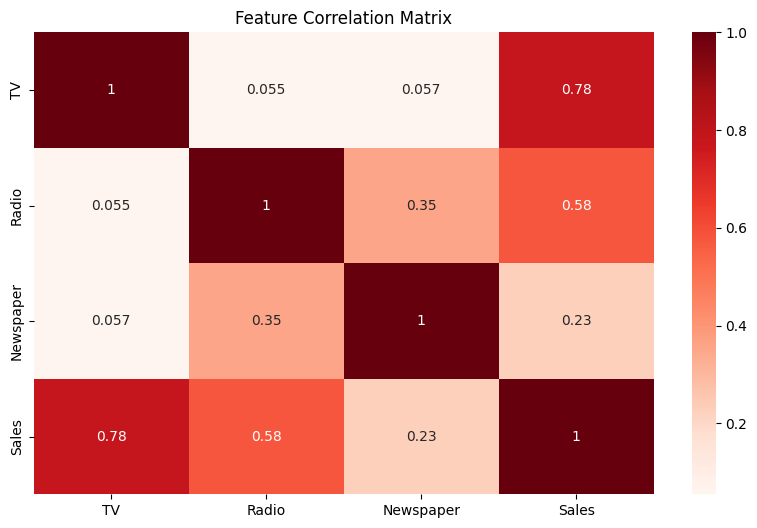

In [45]:

# Visualizing the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title("Feature Correlation Matrix")
plt.show()

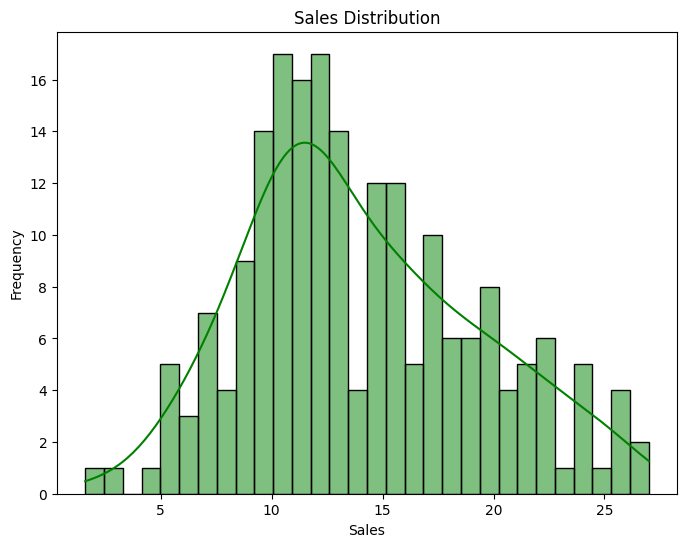

In [47]:
# Visualizing sales distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Sales'], bins=30, kde=True, color='green')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

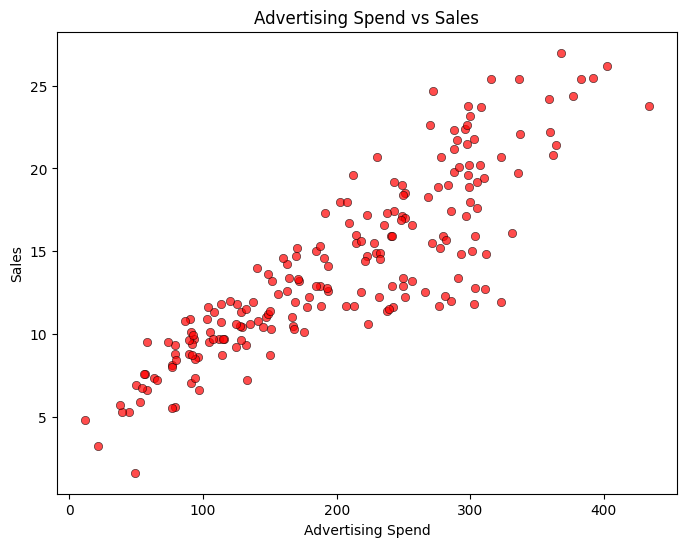

In [48]:
# Visualizing advertising spend vs sales
Advertising_Spend = df["TV"]+df["Radio"]+df["Newspaper"]
plt.figure(figsize=(8,6))
sns.scatterplot(x=Advertising_Spend, y=df['Sales'], alpha=0.7, color= "red", edgecolor = 'black')
plt.title("Advertising Spend vs Sales")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.show()

# Appling Model

In [31]:
# Define features and target variable
X = data.drop(columns=['Sales'])
y = data['Sales']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [34]:
# Predict on test set
lr_predictions = lr_model.predict(X_test)

In [35]:
# Evaluate models
def evaluate_model(model_name, y_test, predictions):
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, predictions):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions)):.2f}")
    print(f"R² Score: {r2_score(y_test, predictions):.2f}\n")

evaluate_model("Linear Regression", y_test, lr_predictions)

Linear Regression Performance:
MAE: 1.46
RMSE: 1.78
R² Score: 0.90



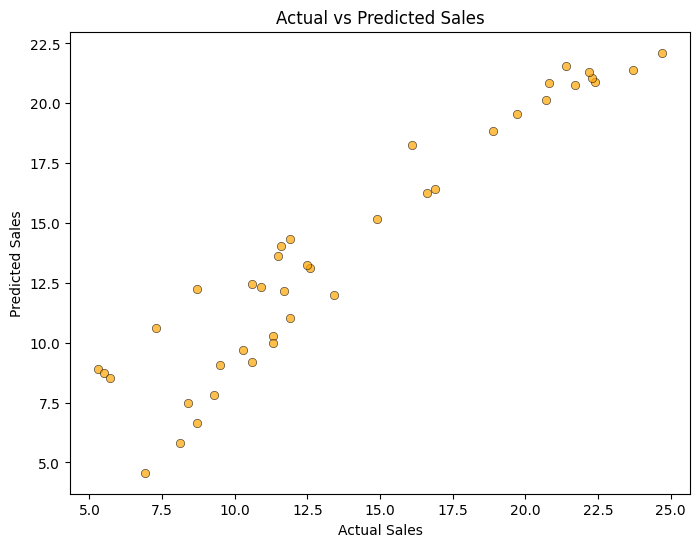

In [51]:
# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=lr_predictions, alpha=0.7, color= "orange", edgecolor= "black")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

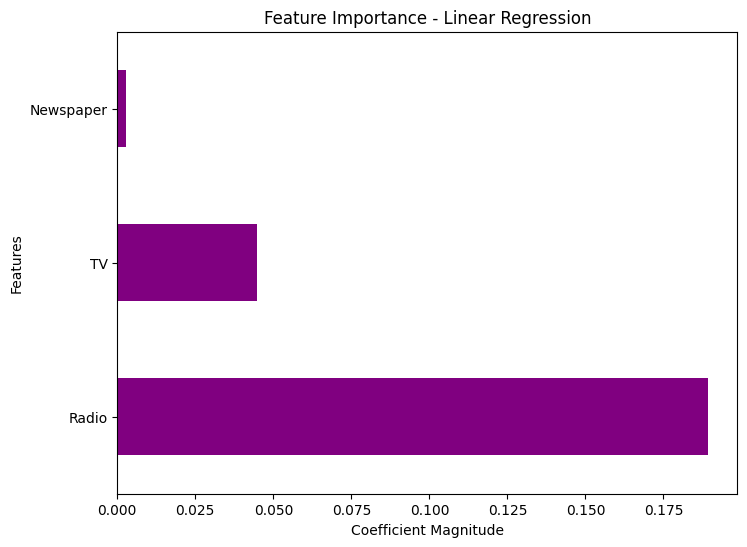

In [40]:
# Get feature importance (coefficients)
feature_importance_lr = pd.Series(np.abs(lr_model.coef_), index=X.columns)

# Sort by importance
feature_importance_lr = feature_importance_lr.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
feature_importance_lr.plot(kind='barh', color='purple')
plt.title("Feature Importance - Linear Regression")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.show()